### Objetivo

Probar que el modelo permite identifiar sujetos cercanos a la semilla -- es decir, les asigna un score de lookalike alto

El procedimiento consiste en:
- Ocultar un proporción `PERC_TO_HIDE` de la semilla: estos van a ser parte de la población durante el entrenamiento, por lo cual tendrán 0 en el target
- Ejecutar el algoritmo de bagging que scorea a todos los sujetos de la población (incluyendo los ocultos)
- Evaluar la posición de los sujetos ocultos en la distribución del score. Esto se puede hacer visualmente o con estadísticos del estilo KS, AUROC, Average Precision, etc.

In [1]:
ID_COLS = []
SEMILLA = 999
PERC_TO_HIDE = 0.5 # proporcion de seed to hide
BAG_ITER = 100 # iteraciones de bagging

In [2]:
from lkmodels import bagged_clf 

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [4]:
# read     
X_seed = pd.read_pickle("data/X_seed.pkl")
X_poblacion = pd.read_pickle("data/X_poblacion.pkl")

# drop IDS
X_seed = X_seed.drop(ID_COLS, axis=1)
X_poblacion = X_poblacion.drop(ID_COLS, axis=1)

# X_seed = X_seed.drop('ing', axis=1)
# X_poblacion = X_poblacion.drop('ing', axis=1)

### Simulación

Escondemos los sujetos de la semilla

In [5]:
# split seed-hidden
np.random.seed(SEMILLA)
X_seed_sim, X_hidden = train_test_split(X_seed, test_size=PERC_TO_HIDE)
# poblacion
X_poblacion_sim = pd.concat([X_poblacion, X_hidden], ignore_index=True)
# indicador de hidden
flag_hidden = np.full(X_poblacion_sim.shape[0], 1)
flag_hidden[:X_poblacion.shape[0]] = 0

Definimos un clasificador base y corremos el algoritmo de baggin

In [6]:
### Base Classifier
# clf = DecisionTreeClassifier
# clf_param = {'min_sample_leaf':1, 'random_state': SEMILLA}

In [7]:
### Lookalike Scores
scores_sim, _ = bagged_clf(
    X_seed_sim, X_poblacion_sim, random_state=SEMILLA, clf='tree',T=50, min_samples_leaf=5)

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [10]:
scores_sim

array([0.75854978, 0.75766046, 0.24742063, ..., 0.56317288, 0.31426091,
       0.45770723])

### Resultados

Visualizamos la distribucion del score en los *Hidden* y en el resto de la población

C:\Users\Sebastian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sebastian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


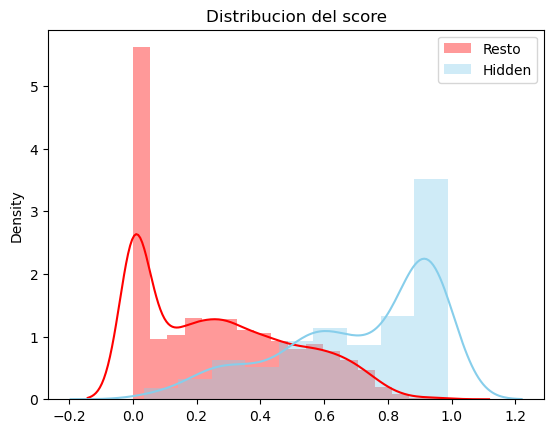

In [15]:
sns.distplot((scores_sim[flag_hidden==0]), color='red', label='Resto') 
sns.distplot((scores_sim[flag_hidden==1]), color='skyblue', label='Hidden') 
plt.title('Distribucion del score')
plt.legend()

C:\Users\Sebastian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sebastian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


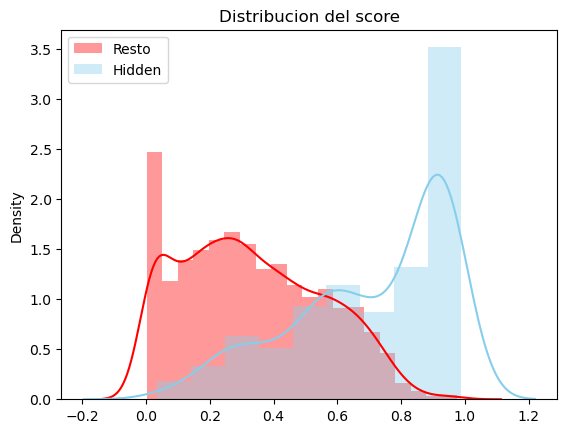

In [16]:
sns.distplot((scores_sim[(flag_hidden==0) & (scores_sim>0)]), color='red', label='Resto') 
sns.distplot((scores_sim[(flag_hidden==1) & (scores_sim>0)]), color='skyblue', label='Hidden') 
plt.title('Distribucion del score')
plt.legend()